## This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Breakdown of this notebook: Loading the dataset: Load the data and import the libraries.

1.Data Cleaning:
   * Dropping Uncessary col's.
   * Dropping duplicates.
   * Checking Missing Value Percent with respect to each column.
   * Dropping row's on having atleast one null value.
   * Reanaming Column's
   * Feature Transfomation

2.Data Visualization
  * using bar graph
  * using pie chart
  * using histogram
  
3. Regression Analysis
  * Linear Regression.
  * Random Forest Regression.


# Importing required libraries

In [1]:
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# reading Data set

In [2]:
games = pd.read_csv("video_games.csv")
games = pd.DataFrame(games)
games.columns = [i.lower() for i in games.columns]
# let's drop duplicate rows 
games = games.drop_duplicates()
print("Dataset shape :",games.shape)

Dataset shape : (16598, 11)


# renaming columns for our convenient

In [3]:
# let's rename some columns 
games.rename(columns = {"na_sales":"north_usa_sales","eu_sales":"europe_sales","jp_sales":"japan_sales"},inplace = True)
games.head()

,rank,name,platform,year,genre,publisher,north_usa_sales,europe_sales,japan_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# let's drop row's  if it as  atleast one null value.
games.dropna(how = "any",inplace = True)
print("Dataset shape after droping row's with null valu's :",games.shape)

Dataset shape after droping row's with null valu's : (16291, 11)


# Displaying missing value percentage

In [5]:
missing_percent = pd.DataFrame(games.isnull().sum(),columns = ["missing percent"])
missing_percent

,missing percent
rank,0
name,0
platform,0
year,0
genre,0
publisher,0
north_usa_sales,0
europe_sales,0
japan_sales,0
other_sales,0


In [6]:
# feature transformation
games.year = games.year.astype(int)

# Let's Explore 

# 1. which game got highest global sales . 

In [7]:
max_sold = games.global_sales.max()
print("game got highest global sales : ") 
name = games[games.global_sales == max_sold][["name","global_sales"]]
name

game got highest global sales : 


,name,global_sales
0,Wii Sports,82.74


# 2. which game's got lowest global sale . 

In [8]:
min_sold = games.global_sales.min()
print("Games got least global sales : ") 
games[games.global_sales == min_sold][["name","global_sales"]]

Games got least global sales : 


,name,global_sales
15980,Turok,0.01
15981,Coven and Labyrinth of Refrain,0.01
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,0.01
15983,Dragon Zakura DS,0.01
15984,Chameleon: To Dye For!,0.01
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


# Year wise global game sales
# insight : 2008 got highest game sale's world wide

Text(0.5, 1.0, 'Year wise global game sales :')

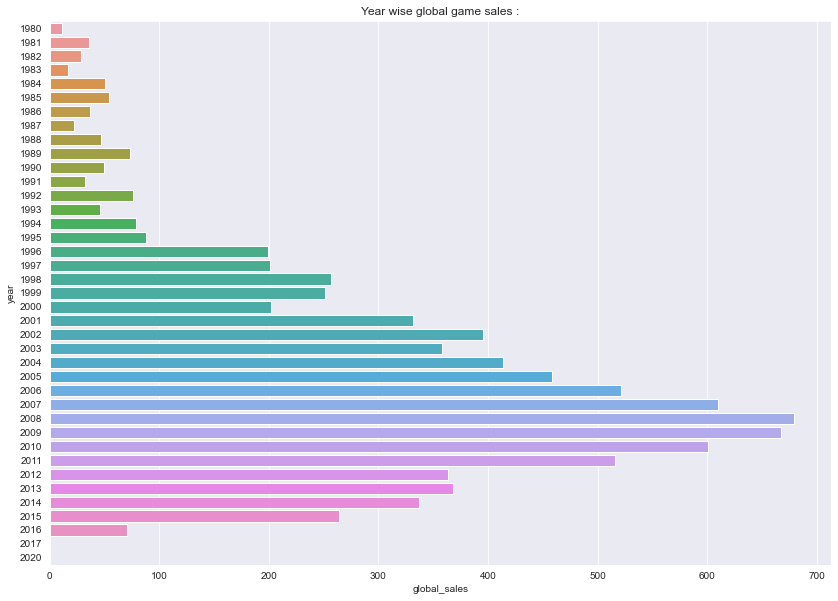

In [9]:
plt.rcParams['figure.figsize'] = (14,10)
year_wise_game_sales  = pd.pivot_table(games ,index = "year" ,values = "global_sales",aggfunc = np.sum)
sns.barplot(year_wise_game_sales["global_sales"],year_wise_game_sales.index,orient = "h")
plt.title("Year wise global game sales :")

# Top 10 platform wise global sale's

Text(0.5, 1.0, 'Top 10 Platform wise global game sales :')

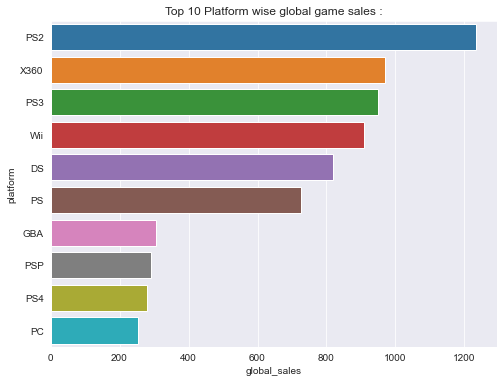

In [10]:
plt.rcParams['figure.figsize'] = (8,6)
platform_wise_game_sales  = pd.pivot_table(games ,index = "platform" ,values = "global_sales",aggfunc = np.sum)
platform_wise_game_sales  = platform_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(10)
sns.barplot(platform_wise_game_sales["global_sales"],platform_wise_game_sales.index,orient = "h")
plt.title("Top 10 Platform wise global game sales :")

# Top 10 Genre wise global sale's .
# wow  action game's is at top !!

Text(0.5, 1.0, 'Top 10 Genre wise global game sales :')

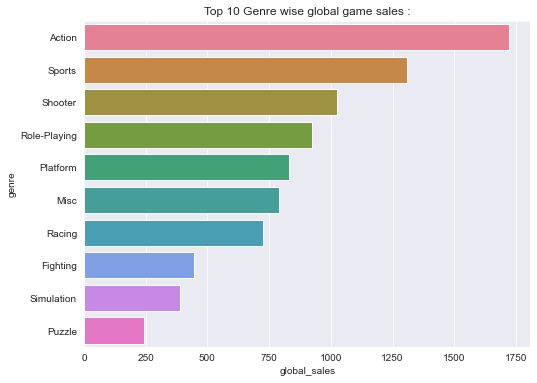

In [11]:
plt.rcParams['figure.figsize'] = (8,6)
genre_wise_game_sales  = pd.pivot_table(games ,index = "genre" ,values = "global_sales",aggfunc = np.sum)
genre_wise_game_sales  = genre_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(10)
sns.barplot(genre_wise_game_sales["global_sales"],genre_wise_game_sales.index,orient = "h",palette = "husl")
plt.title("Top 10 Genre wise global game sales :")

# Top 10 Publisher wise global game sales

Text(0.5, 1.0, 'Top 10 Publisher wise global game sales :')

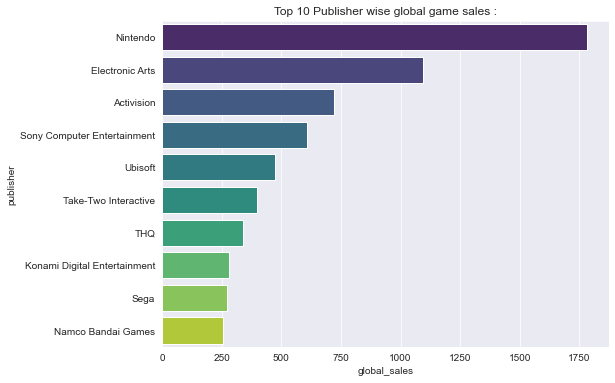

In [12]:
plt.rcParams['figure.figsize'] = (8,6)
publisher_wise_game_sales  = pd.pivot_table(games ,index = "publisher" ,values = "global_sales",aggfunc = np.sum)
publisher_wise_game_sales  = publisher_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(10)
sns.barplot(publisher_wise_game_sales["global_sales"],publisher_wise_game_sales.index,orient = "h",palette = "viridis")
plt.title("Top 10 Publisher wise global game sales :") 

# Let's find Top 5 Best game's from Top 5  Genre's .

#  Which is the Top Five Best Action Game's

,name,global_sales
16,Grand Theft Auto V,21.40
17,Grand Theft Auto: San Andreas,20.81
24,Grand Theft Auto: Vice City,16.15
38,Grand Theft Auto III,13.10
45,Pokemon HeartGold/Pokemon SoulSilver,11.90


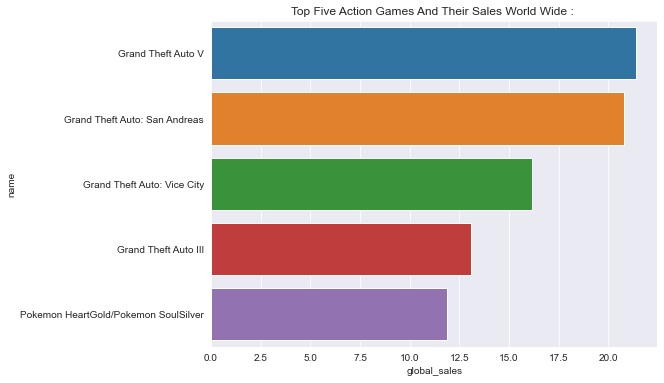

In [13]:
top_five_action_games = games[games.genre == "Action"][["name","global_sales"]]
top_five_action_games = top_five_action_games.sort_values(by = "global_sales",ascending = False )
top_five_action_games = top_five_action_games.drop_duplicates(["name"]).head(5)
sns.barplot(top_five_action_games["global_sales"],top_five_action_games["name"])
plt.title("Top Five Action Games And Their Sales World Wide : ")
top_five_action_games

# Which is the Top Five Best Sport Game's

,name,global_sales
0,Wii Sports,82.74
3,Wii Sports Resort,33.00
13,Wii Fit,22.72
14,Wii Fit Plus,22.00
77,FIFA 16,8.49


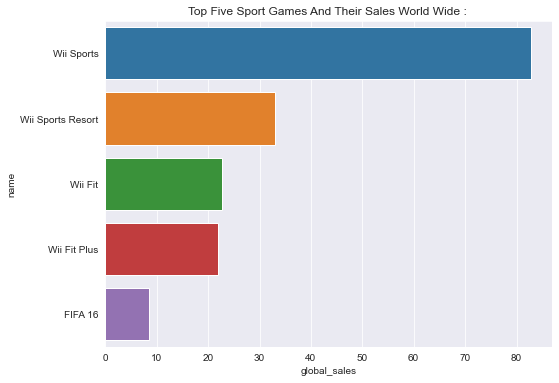

In [14]:
top_five_Sports_games = games[games.genre == "Sports"][["name","global_sales"]]
top_five_Sports_games = top_five_Sports_games.sort_values(by = "global_sales",ascending = False )
top_five_Sports_games = top_five_Sports_games.drop_duplicates(["name"]).head(5)
sns.barplot(top_five_Sports_games["global_sales"],top_five_Sports_games["name"])
plt.title("Top Five Sport Games And Their Sales World Wide : ")
top_five_Sports_games

# Which is the Top Five Best Shooting Game's

,name,global_sales
9,Duck Hunt,28.31
29,Call of Duty: Modern Warfare 3,14.76
31,Call of Duty: Black Ops,14.64
33,Call of Duty: Black Ops 3,14.24
34,Call of Duty: Black Ops II,14.03


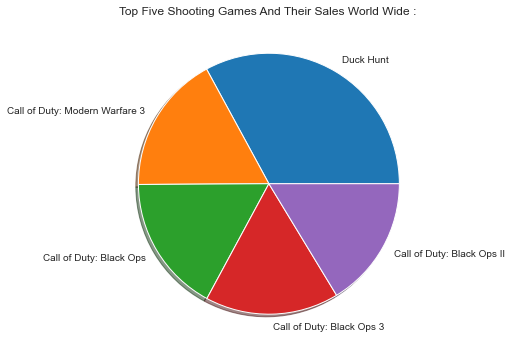

In [15]:
top_five_Shooting_games = games[games.genre == "Shooter"][["name","global_sales"]]
top_five_Shooting_games = top_five_Shooting_games.sort_values(by = "global_sales",ascending = False )
top_five_Shooting_games = top_five_Shooting_games.drop_duplicates(["name"]).head(5)
plt.pie(x = top_five_Shooting_games["global_sales"],labels= list(top_five_Shooting_games.name),shadow=True)
plt.title("Top Five Shooting Games And Their Sales World Wide : ")
top_five_Shooting_games

# Which is the Top Five Best Platform Game's

,name,global_sales
1,Super Mario Bros.,40.24
6,New Super Mario Bros.,30.01
8,New Super Mario Bros. Wii,28.62
18,Super Mario World,20.61
21,Super Mario Land,18.14


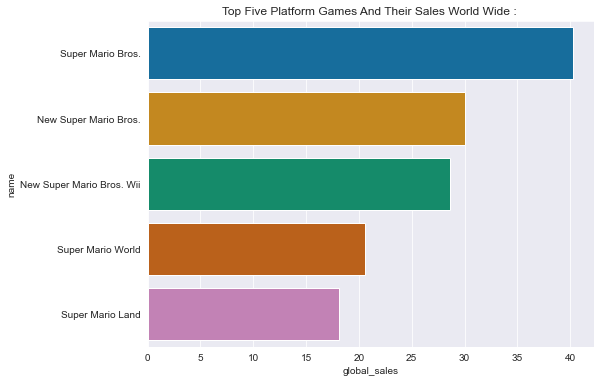

In [16]:
top_five_Platform_games = games[games.genre == "Platform"][["name","global_sales"]]
top_five_Platform_games = top_five_Platform_games.sort_values(by = "global_sales",ascending = False )
top_five_Platform_games = top_five_Platform_games.drop_duplicates(["name"]).head(5)
sns.barplot(top_five_Platform_games["global_sales"],top_five_Platform_games["name"],palette = 'colorblind')
plt.title("Top Five Platform Games And Their Sales World Wide : ")
top_five_Platform_games

# Which is the Top Five Best Role-Playing Game's

,name,global_sales
4,Pokemon Red/Pokemon Blue,31.37
12,Pokemon Gold/Pokemon Silver,23.10
20,Pokemon Diamond/Pokemon Pearl,18.36
25,Pokemon Ruby/Pokemon Sapphire,15.85
26,Pokemon Black/Pokemon White,15.32


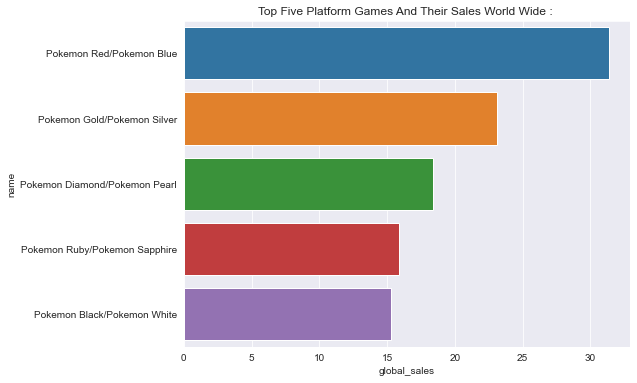

In [17]:
top_five_Role_Playing_games = games[games.genre == "Role-Playing"][["name","global_sales"]]
top_five_Role_Playing_games = top_five_Role_Playing_games.sort_values(by = "global_sales",ascending = False )
top_five_Role_Playing_games = top_five_Role_Playing_games.drop_duplicates(["name"]).head(5)
sns.barplot(top_five_Role_Playing_games["global_sales"],top_five_Role_Playing_games["name"])
plt.title("Top Five Platform Games And Their Sales World Wide : ")
top_five_Role_Playing_games

# Which is the highest sold Game in North_USA

In [18]:
north_usa_highest_sold_game = games.north_usa_sales.max()
print("highest sold Game in North_USA :")
games[games["north_usa_sales"] == north_usa_highest_sold_game][["name","north_usa_sales"]]

highest sold Game in North_USA :


,name,north_usa_sales
0,Wii Sports,41.49


# Which is the highest sold Game in EUROPE

In [19]:
Europe_highest_sold_game = games.europe_sales.max()
print("highest sold Game in EUROPE :")
games[games["europe_sales"] == Europe_highest_sold_game][["name","europe_sales"]]

highest sold Game in EUROPE :


,name,europe_sales
0,Wii Sports,29.02


# Which is the highest sold Game in JAPAN

In [20]:
Japan_highest_sold_game = games.japan_sales.max()
print("highest sold Game in Japan :")
games[games["japan_sales"] == Japan_highest_sold_game][["name","japan_sales"]]

highest sold Game in Japan :


,name,japan_sales
4,Pokemon Red/Pokemon Blue,10.22


# Which is the highest sold Game in Other_Sales

In [21]:
other_sales_highest_sold_game = games.other_sales.max()
print("highest sold Game in Other_Sales :")
games[games["other_sales"] == other_sales_highest_sold_game][["name","other_sales"]]

highest sold Game in Other_Sales :


,name,other_sales
17,Grand Theft Auto: San Andreas,10.57


# Total Sale's Year Wise

Text(0, 0.5, 'avg global_sales')

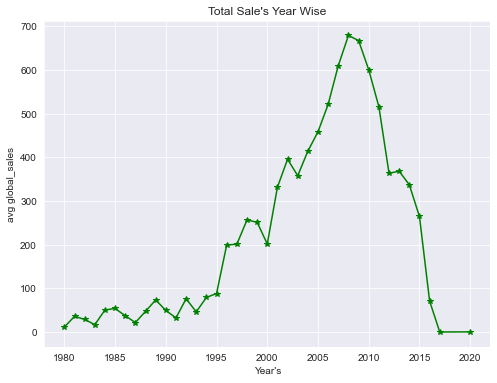

In [23]:
tot_sales_year_wise = pd.pivot_table(games,index = "year",values = "global_sales",aggfunc= np.sum)
#print(avg_sales_year_wise) #uncomment this to know Total sale's value's with respect each year.
plt.plot(tot_sales_year_wise.index,tot_sales_year_wise["global_sales"],color = 'g',marker = "*")
plt.title("Total Sale's Year Wise")
plt.xlabel("Year's")
plt.ylabel("avg global_sales")

# Let's see the distribution Sale's in different regions

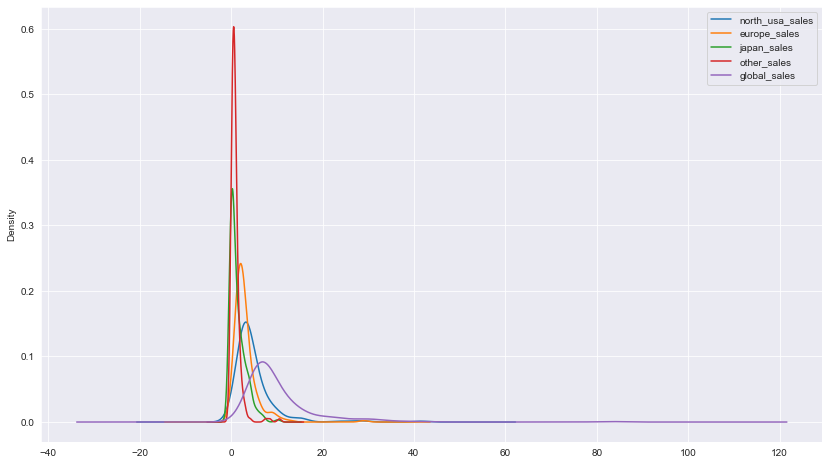

In [24]:
plt.figure(figsize = (14,8))
ax = games.north_usa_sales[:200].plot.kde()
ax = games.europe_sales[:200].plot.kde()
ax = games.japan_sales[:200].plot.kde()
ax = games.other_sales[:200].plot.kde()
ax = games.global_sales[:200].plot.kde()
ax.legend()

In [36]:
# dropping columns
data = games.copy()
data.drop(["north_usa_sales","europe_sales","japan_sales","other_sales","rank"],axis = 1,inplace = True)

In [45]:
def data_encode(x_data):
    for i in x_data.columns:
        x_data[i]=x_data[i].factorize()[0]
        
    return x_data    
    
x_data = data.drop("global_sales",axis = 1)
y_data = data["global_sales"]
x_data = data_encode(x_data)

# Model Building

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=.3,random_state=1)

# Linear Regression

In [66]:
lr_model =LinearRegression()
lr_model.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest,ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score for Linear Reg model : ",r2_score(ytest,ypred))
print("adjusted_r2_score Value       : ",adjusted_r2_score)                         
print("MSE for Linear Regression     : ",mean_squared_error(ytest,ypred))

r2_score for Linear Reg model :  0.16778086969029593
adjusted_r2_score Value       :  0.1669285354724449
MSE for Linear Regression     :  1.6443368850193807


# Random Forest Regressor

In [68]:
rf_model = RandomForestRegressor(n_estimators=200,min_samples_split=20,random_state=43)
rf_model.fit(xtrain,ytrain)
ypred = rf_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest,ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score for Random Forest Reg model : ",r2_score(ytest,ypred))
print("adjusted_r2_score Value              : ",adjusted_r2_score)
print("MSE for Random Forest Regression     : ",mean_squared_error(ytest,ypred))

r2_score for Random Forest Reg model :  0.8621757900499739
adjusted_r2_score Value              :  0.8620346345707133
MSE for Random Forest Regression     :  0.27231942143068094


In [69]:
# random forest seems fine

# Thank You :)

In [70]:
# My favourite Game is "Tom clancy's Splinter Cell ",
# What's your's comment below.